In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df = pd.concat([df, pd.DataFrame(wine.target, columns=['wine_class'])], axis="columns")

In [4]:
df["wine_class"].value_counts()

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

In [5]:
rel_df = df[["flavanoids", "hue", "proline", "od280/od315_of_diluted_wines", "wine_class"]]

<Axes: >

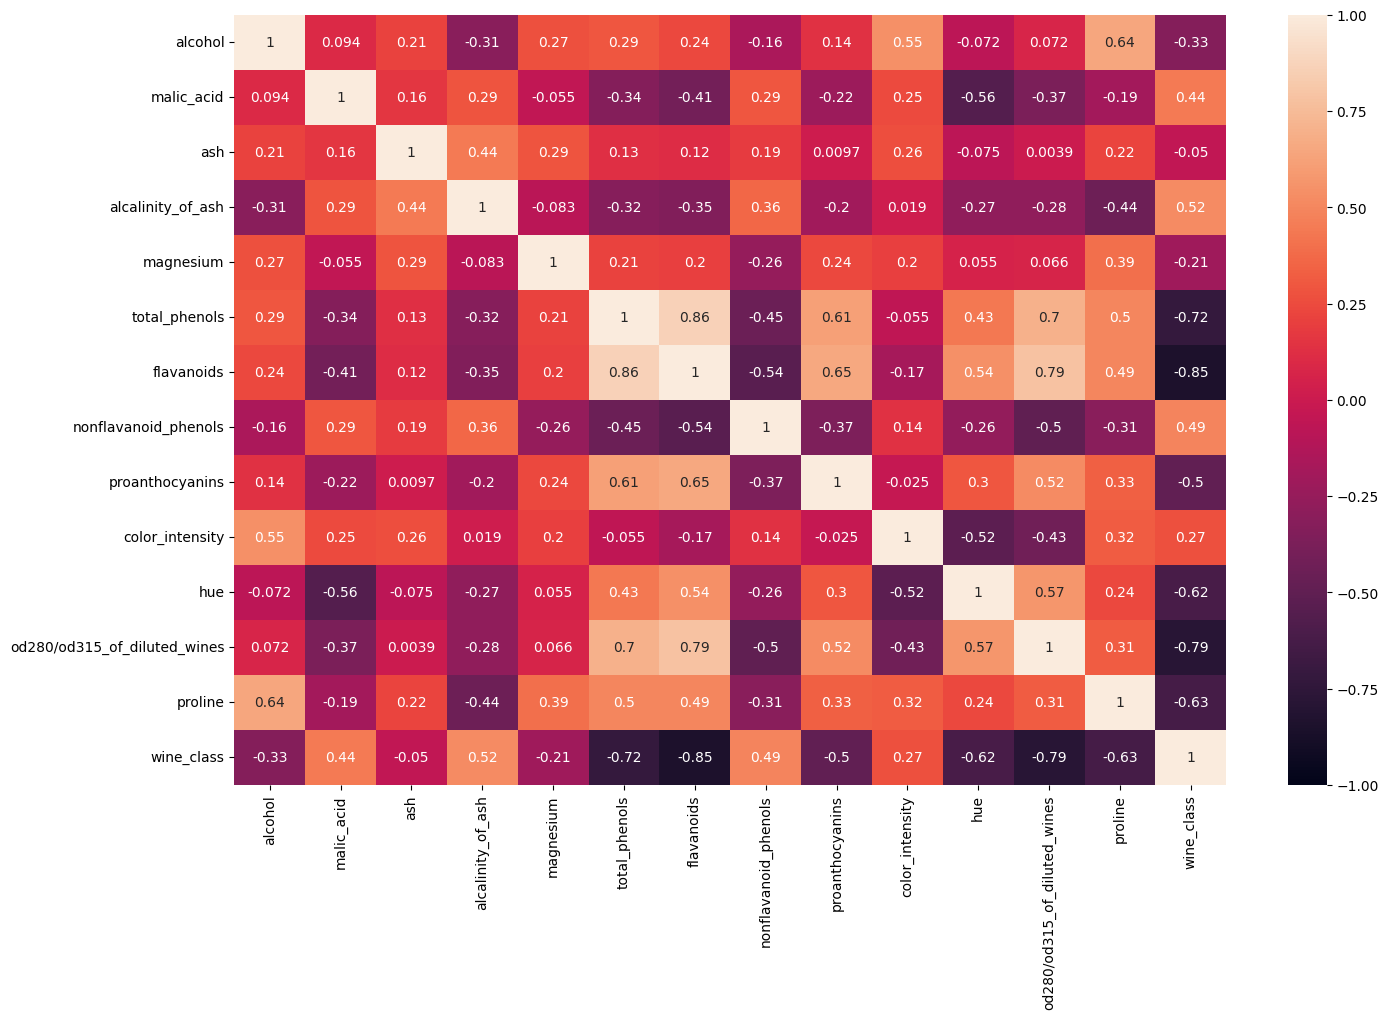

In [6]:
ax, fig = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

X, y = df.drop(["wine_class"], axis="columns"), df["wine_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_KNN = KNeighborsClassifier(n_neighbors=1)

model_KNN.fit(scaled_X_train, y_train)

y_hat = model_KNN.predict(scaled_X_test)

y_hat

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       1])

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



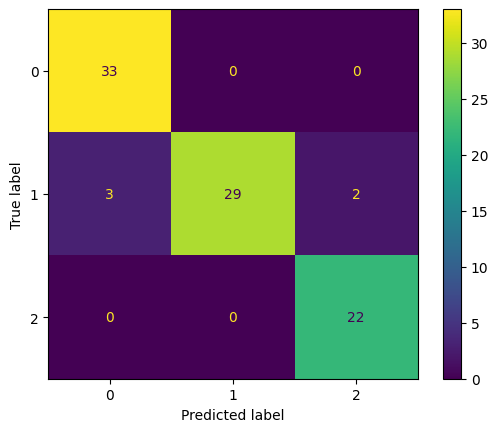

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(y_test, y_hat):.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat)).plot()
print(classification_report(y_test, y_hat))

### Nedan: test med utvalda välkorrelrande kolumner (dåligt)

In [9]:
# X, y = rel_df.drop(["wine_class"], axis="columns"), rel_df["wine_class"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# model_KNN = KNeighborsClassifier(n_neighbors=1)

# model_KNN.fit(scaled_X_train, y_train)

# y_hat = model_KNN.predict(scaled_X_test)
# y_hat

In [10]:
# print(f"Accuracy: {accuracy_score(y_test, y_hat):.2f}")
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat)).plot()
# print(classification_report(y_test, y_hat))

In [11]:
error = 1-accuracy_score(y_test, y_hat)
error_list = []

for i in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(scaled_X_train, y_train)
    y_hat = model_KNN.predict(scaled_X_test)
    error = 1-accuracy_score(y_test, y_hat)
    error_list.append(error)

[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'K'), Text(0, 0.5, 'Error')]

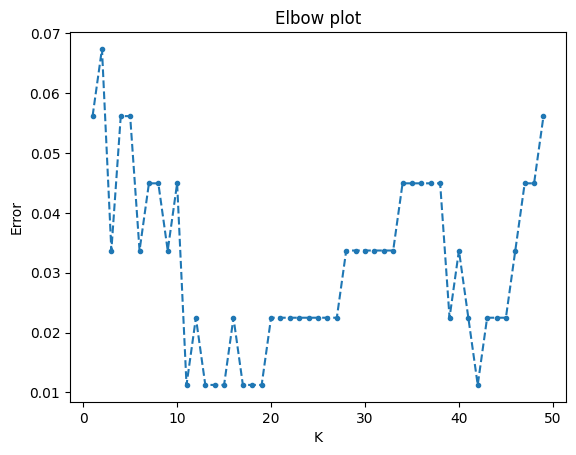

In [12]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, "--.")
ax.set(title="Elbow plot", xlabel="K", ylabel="Error")

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



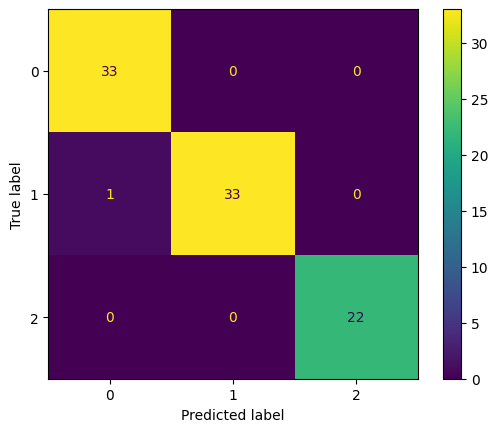

In [13]:
model_KNN = KNeighborsClassifier(n_neighbors=11)
model_KNN.fit(scaled_X_train, y_train)
y_hat = model_KNN.predict(scaled_X_test)

print(f"Accuracy: {accuracy_score(y_test, y_hat):.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat)).plot()
print(classification_report(y_test, y_hat))